In [55]:
!pip install mlxtend

!pip install --upgrade ipython matplotlib

In [56]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [58]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

In [59]:
data = pd.read_excel('C:\\Users\\NANDAKISHORE BOINI\\OneDrive\\Desktop\\Online retail.xlsx',header=None)
# Display the first few rows of the dataset to verify it loaded correctly.
data.head()


,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [61]:
data.describe()

,0
count,7501
unique,5176
top,cookies
freq,223


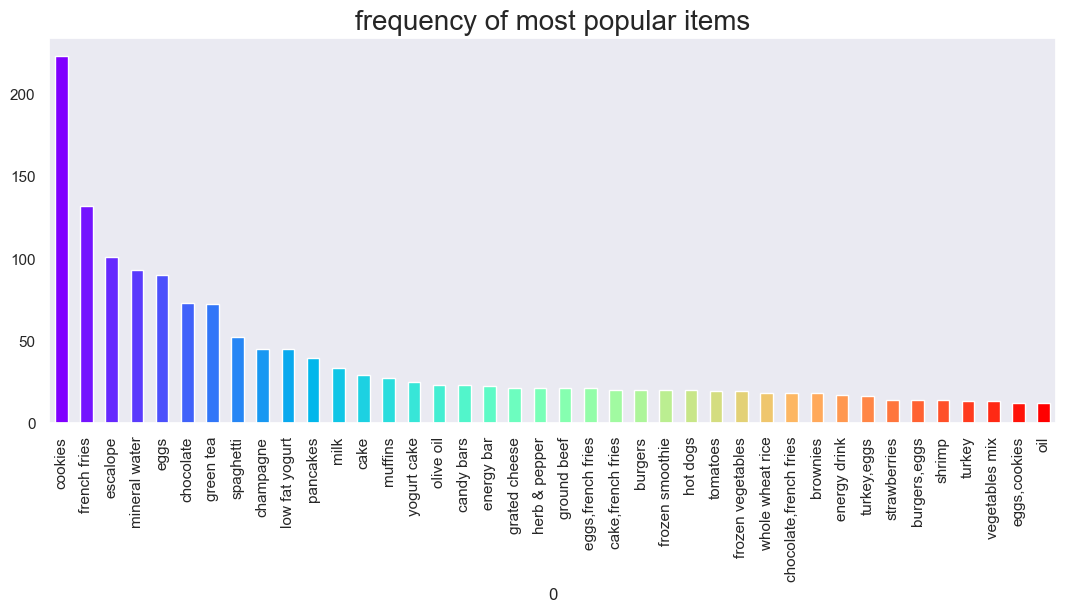

In [62]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

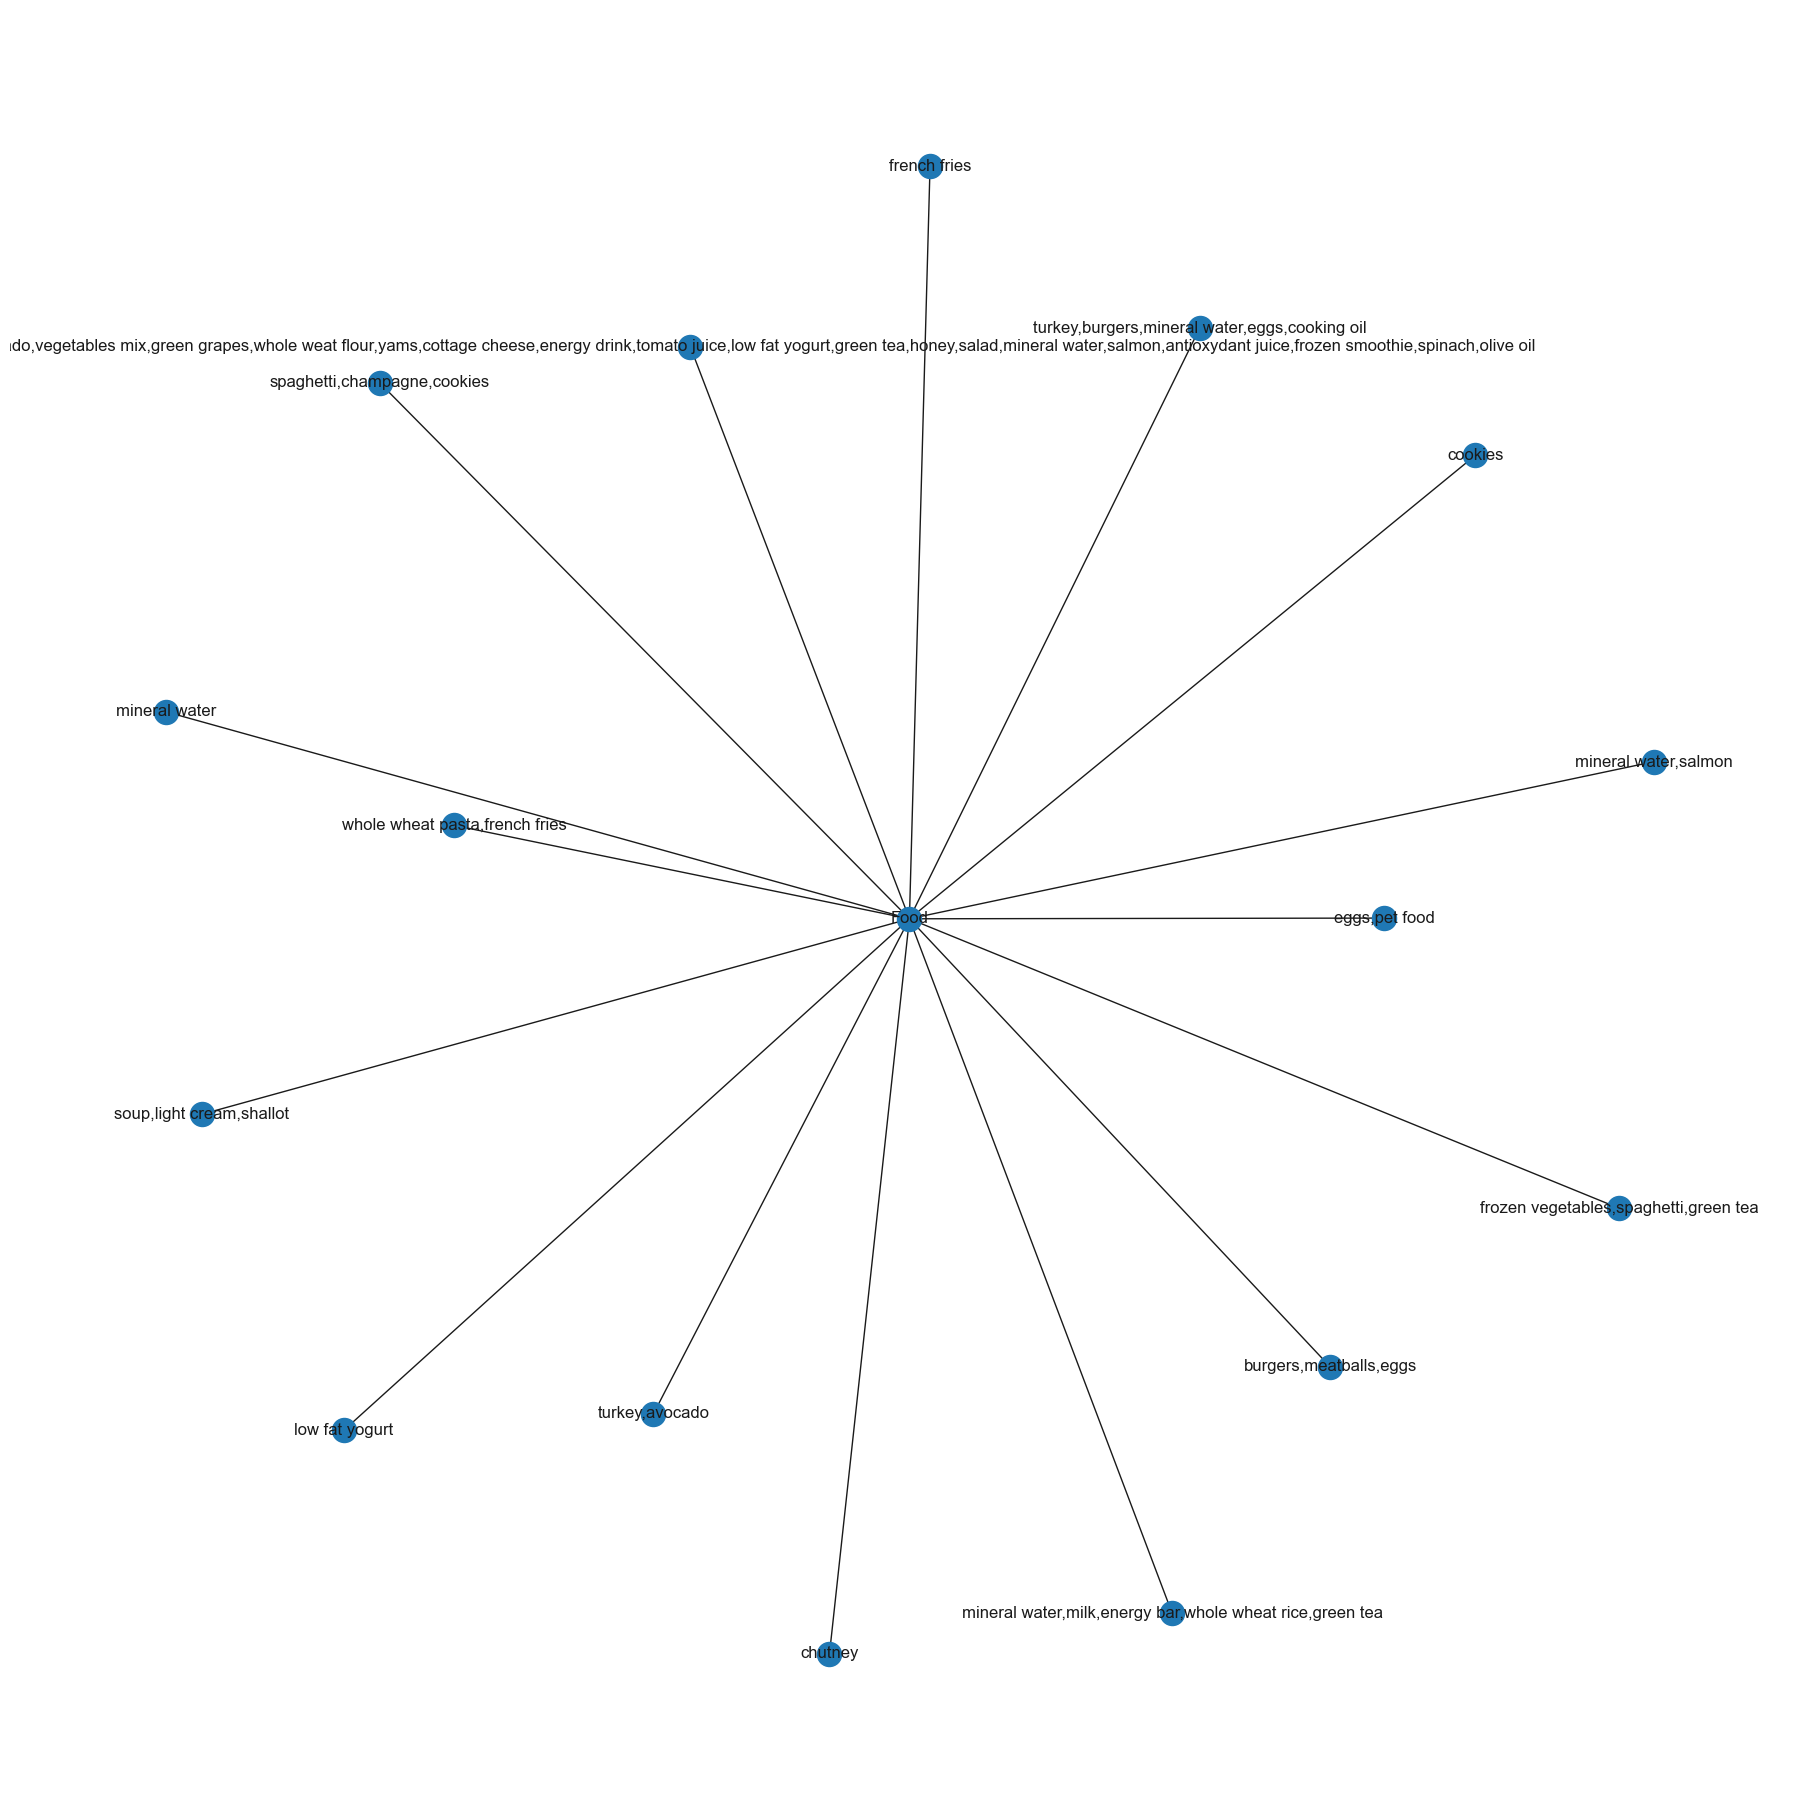

In [63]:
import networkx as nx
import matplotlib.pyplot as plt # import matplotlib

data['Food'] = 'Food'
food = data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'Food', target = 0, edge_attr = False)
nx.draw(food, with_labels=True) # call draw from the nx module
plt.show() # this will display the graph

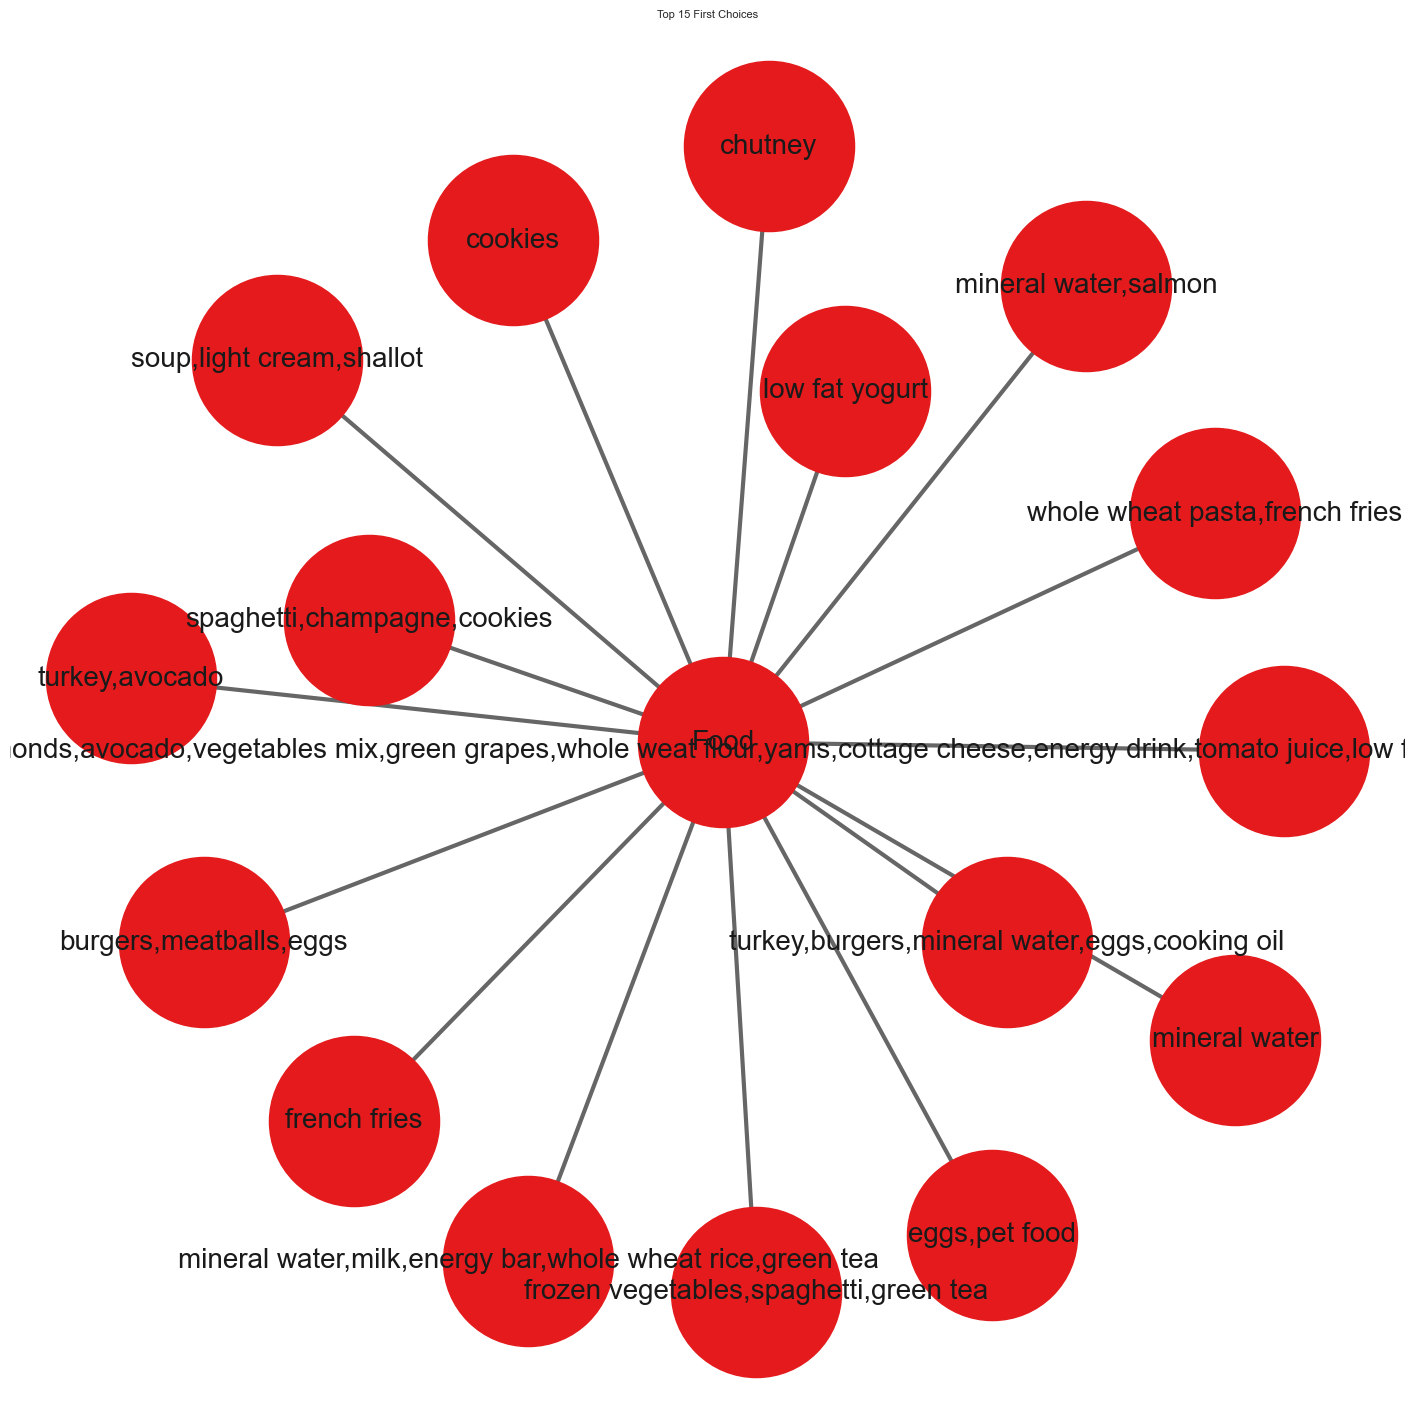

In [64]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 18)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize =8)
plt.show()

In [65]:

from sklearn.impute import SimpleImputer
data.columns = data.columns.astype(str)

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')  # Replace missing values with the most frequent value
data.iloc[:, :] = imputer.fit_transform(data)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Convert data to appropriate format (if needed)
# Example: Convert numerical columns to integers or floats
#data['0'] = data['0'].astype(int)

# Ensure data types are suitable for association rule mining
# Example: Convert categorical columns to strings
data['Food'] = data['Food'].astype(str)

# Display the preprocessed dataset
data.head()


,0,Food
0,"shrimp,almonds,avocado,vegetables mix,green gr...",Food
1,"burgers,meatballs,eggs",Food
2,chutney,Food
3,"turkey,avocado",Food
4,"mineral water,milk,energy bar,whole wheat rice...",Food


In [66]:

# Convert the data into a list of lists
transactions = data['0'].str.split(',').to_list()

# Create a set of unique items
all_items = set()
for transaction in transactions:
  for item in transaction:
    all_items.add(item)

# Create an empty DataFrame for one-hot encoding
# Convert all_items to a list
one_hot_data = pd.DataFrame(0, index=range(len(transactions)), columns=list(all_items))

# Perform one-hot encoding
for i, transaction in enumerate(transactions):
  for item in transaction:
    one_hot_data.loc[i, item] = 1

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_data, min_support=0.01, use_colnames=True)  # Adjust min_support as needed

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)  # Adjust min_threshold as needed

# Display the generated rules
print(rules)

                    antecedents                 consequents  \
0                        (milk)                      (cake)   
1                        (cake)                      (milk)   
2                   (green tea)                      (cake)   
3                        (cake)                 (green tea)   
4                      (shrimp)                      (cake)   
..                          ...                         ...   
835  (spaghetti, mineral water)                  (tomatoes)   
836   (tomatoes, mineral water)                 (spaghetti)   
837                 (spaghetti)   (tomatoes, mineral water)   
838                  (tomatoes)  (spaghetti, mineral water)   
839             (mineral water)       (spaghetti, tomatoes)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.170015            0.103555  0.018934    0.111364  1.075407   
1              0.103555            0.170015  0.018934    0.182836  1.075407   
2     

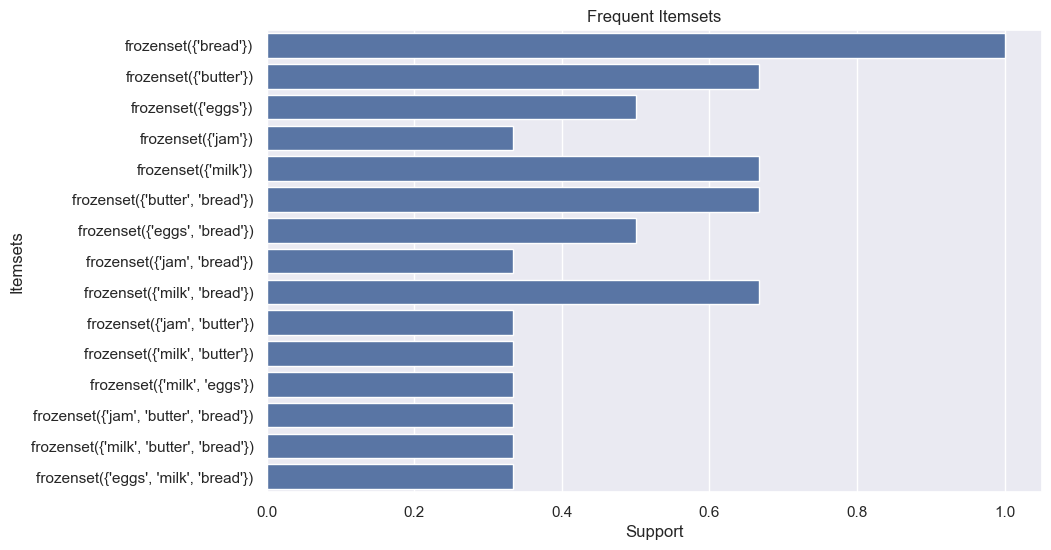

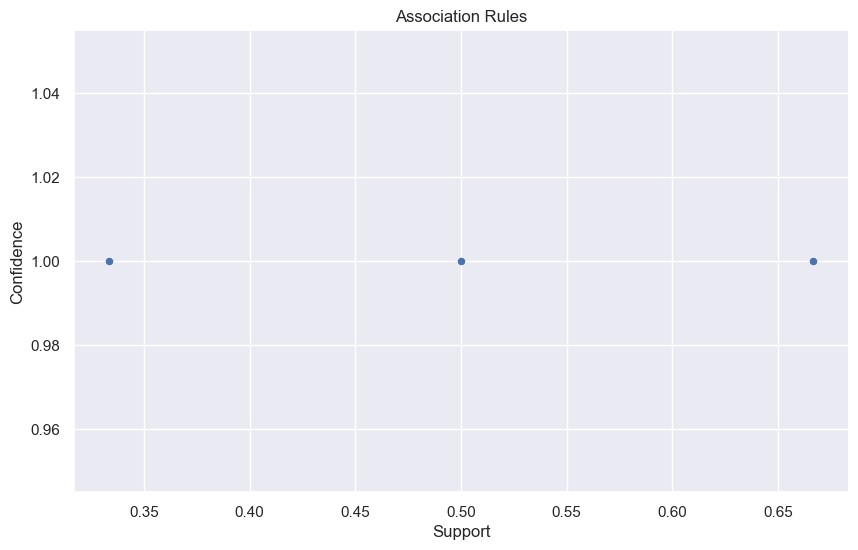

In [67]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction data (list of lists)
transactions = [
    ['milk', 'bread', 'eggs'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'butter', 'jam'],
    ['eggs', 'bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['eggs', 'bread', 'milk']]

# Convert transactions to one-hot encoded format
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(onehot_df, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Plotting frequent itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets)
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets')
plt.show()

# Plotting association rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', data=rules)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()



In [68]:

# Sort the rules by lift in descending order to find the most interesting patterns
rules_sorted = rules.sort_values('lift', ascending=False)

# Display the top 10 rules
print(rules_sorted.head(10))

# Analyze the antecedents and consequents of the rules
# Look for rules with high lift and confidence
# Identify products that are frequently bought together
# Explore the relationships between different product categories

# Example:
# Find rules where a specific product is in the antecedent
product_of_interest = 'product_name'
rules_with_product = rules_sorted[rules_sorted['antecedents'].apply(lambda x: product_of_interest in list(x))]
print(rules_with_product)

# You can further analyze the rules by:
# - Visualizing the rules using a graph
# - Grouping rules by product categories
# - Calculating metrics like support, confidence, and lift for different subsets of rules


      antecedents      consequents  antecedent support  consequent support  \
4           (jam)         (butter)            0.333333            0.666667   
6    (jam, bread)         (butter)            0.333333            0.666667   
7           (jam)  (butter, bread)            0.333333            0.666667   
0        (butter)          (bread)            0.666667            1.000000   
1          (eggs)          (bread)            0.500000            1.000000   
2           (jam)          (bread)            0.333333            1.000000   
3          (milk)          (bread)            0.666667            1.000000   
5   (jam, butter)          (bread)            0.333333            1.000000   
8  (milk, butter)          (bread)            0.333333            1.000000   
9    (milk, eggs)          (bread)            0.333333            1.000000   

    support  confidence  lift  leverage  conviction  zhangs_metric  
4  0.333333         1.0   1.5  0.111111         inf            0.5  
6  

In [69]:

# 1. What is lift and why is it important in Association rules?

#   Lift is a measure of how much more likely two items are to be bought together than if they were independent.
#   It quantifies the dependency between items. A lift value greater than 1 indicates a positive correlation,
#   meaning that the presence of one item increases the probability of the other item being purchased.
#   Lift is important because it helps distinguish between spurious associations and truly meaningful relationships.
#   It helps identify rules that are truly interesting and not just due to the individual popularity of the items.

# 2. What is support and Confidence. How do you calculate them?

#   - Support:  The proportion of transactions that contain both the antecedent and consequent of a rule.
#     It measures the overall frequency of a rule in the dataset.
#     Calculation: Support(A → B) =  (Transactions containing both A and B) / (Total number of transactions)

#   - Confidence:  The probability that a transaction containing the antecedent will also contain the consequent.
#     It measures the reliability of the rule.
#     Calculation: Confidence(A → B) = (Transactions containing both A and B) / (Transactions containing A)

# 3. What are some limitations or challenges of Association rules mining?

#   - Data sparsity:  Many datasets have a large number of items and a relatively small number of transactions,
#     leading to sparse data. This can make it difficult to find meaningful associations.
#   - Scalability:  As the dataset grows larger, the computational cost of finding association rules increases significantly.
#   - Interpretability:  While association rules can reveal interesting patterns, interpreting the results can be challenging,
#     especially with a large number of rules.
#   - Contextual relevance:  Association rules might not always reflect real-world relationships.
#     It's important to consider the context of the data and the domain knowledge when interpreting the results.
#   - Handling noisy data:  Association rule mining can be sensitive to noisy data. Outliers or irrelevant items can affect the results.
